# Jagdeep Singh - Observing with `astroplan`

* I have given you three locations, some constraints, and list of targets: `TargetStars.csv`.
* You are observing on June 21, 2018.
* Your job is to determine which of the three locations can see the most targets, given the constraints.
* Points awarded will depend on how clearly you support your answer.

# Date: June 21, 2018.

---

# Locations

- Grytviken, South Georgia Island
- Bairiki, South Tarawa, Kiribati
- Lochboisdale, Outer Hebrides, Scotland

---

# Constraints

- Observing at (local) night
- Airmass < 2
- Moon Separation > 30 degrees

---

In [1]:
import numpy as np
from astropy.table import QTable
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import pytz
from astroplan import Observer, FixedTarget
import warnings
warnings.filterwarnings('ignore', category=Warning)
%matplotlib inline
import matplotlib.pyplot as plt
from astroplan import time_grid_from_range
from astroplan.plots import plot_sky, plot_airmass
from astroplan import AltitudeConstraint, AirmassConstraint
from astroplan import observability_table
from astroplan import moon_illumination
from astroplan import MoonSeparationConstraint

In [2]:
target_table = QTable.read('TargetStars.csv', format='ascii.csv')
targets = [FixedTarget(coord=SkyCoord(ra = RA*u.hourangle, dec = DEC*u.deg), name=Name)
           for Name, RA, DEC in target_table]

observe_date = Time("2018-6-21" , format='iso')

### South Georgia Site

In [3]:
# sets up observer object for Grytviken, South Georgia Island
south_georgia = Observer(longitude = -36.5087 * u.deg,
                        latitude = -54 * u.deg + 16 * u.arcmin + 52 * u.arcsec,
                        elevation = 0 * u.m,
                        timezone = 'Atlantic/South_Georgia',
                        name = "Grytviken, South Georgia Island"
                        )

In [60]:
observe_start1 = south_georgia.sun_set_time(observe_date, which='nearest')  
observe_end1 = south_georgia.sun_rise_time(observe_date, which='next')

observing_length1 = (observe_end1 - observe_start1).to(u.h) 
observing_range1 = [observe_start1, observe_end1]

time_grid1 = time_grid_from_range(observing_range1)
print("start " + str(observe_start1))
print("end " + str(observe_end1))
print("length " + str(observing_length1))

start 2458290.251996239
end 2458290.9532239153
length 16.829464226961136 h


In [61]:
constraints = [AirmassConstraint(2), MoonSeparationConstraint(30*u.deg)]
observing_table1 = observability_table(constraints, south_georgia, 
                                      targets, time_range=observing_range1)
print(observing_table1)

  target name   ever observable always observable fraction of time observable
--------------- --------------- ----------------- ---------------------------
          Mizar           False             False                         0.0
          Spica           False             False                         0.0
         Alkaid           False             False                         0.0
          Hadar            True             False              0.794117647059
       Arcturus           False             False                         0.0
RigelKentaurusB            True             False              0.852941176471
RigelKentaurusA            True             False              0.852941176471
           Izar           False             False                         0.0
         Kochab           False             False                         0.0
       Alphekka           False             False                         0.0
            ...             ...               ...               

9 stars are observable


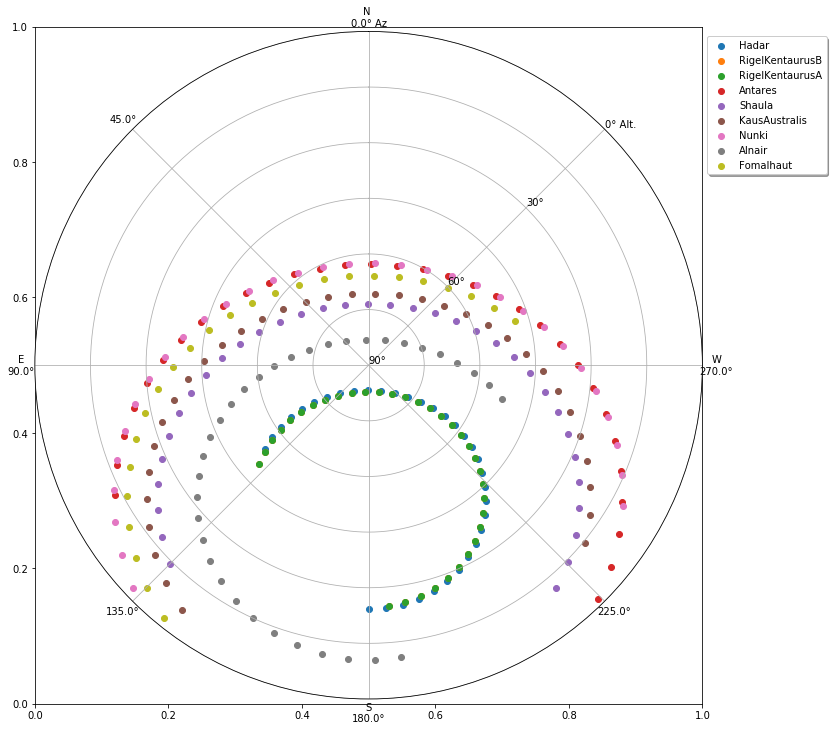

In [77]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

fig.tight_layout()
b = 0
for i, my_object in enumerate(targets):
    if observing_table1['ever observable'][i]:
        ax = plot_sky(my_object, south_georgia, time_grid1)
        b += 1

ax.legend(loc="upper left", bbox_to_anchor=(1,1), shadow=True);
print(str(b) + " stars are observable")

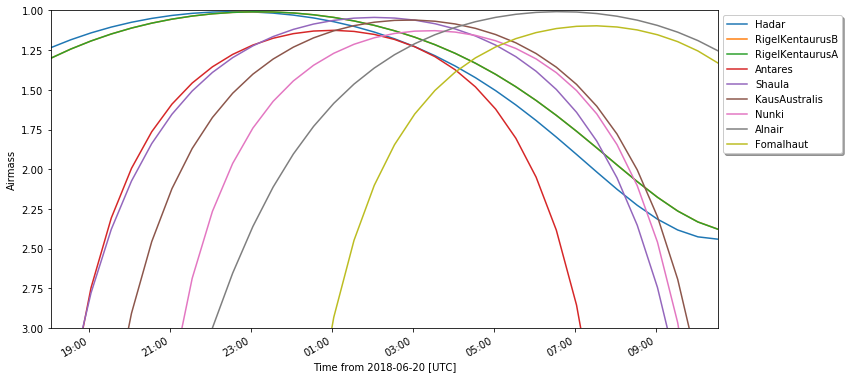

In [63]:
fig1,ax1 = plt.subplots(1,1)
fig1.set_size_inches(10,5)

fig1.tight_layout()

for i, my_object in enumerate(targets):
    if observing_table1['ever observable'][i]:
        ax = plot_airmass(my_object, south_georgia, time_grid1)

ax1.legend(loc="upper left", bbox_to_anchor=(1,1), shadow=True);

## Bairiki Site

In [64]:
# sets up observer object for Bairiki, South Tarawa, Kiribati
kiribati = Observer(longitude = 173.0 * u.deg,
                    latitude = 1 * u.deg + 25 * u.arcmin + 59.9 * u.arcsec,
                    elevation = 3.0001 * u.m,
                    timezone = 'Pacific/Tarawa',
                    name = "Bairiki, South Tarawa, Kiribati"
                    )

In [71]:
observe_start2 = kiribati.twilight_evening_astronomical(observe_date, which='nearest') 
observe_end2 = kiribati.twilight_morning_astronomical(observe_date, which='next')

observing_length2 = (observe_end2 - observe_start2).to(u.h) 
observing_range2 = [observe_start2, observe_end2]

time_grid2 = time_grid_from_range(observing_range2)
print("start " + str(observe_start2))
print("end " + str(observe_end2))
print("length " + str(observing_length2))

start 2458290.8271819307
end 2458291.214194912
length 9.288311552256348 h


In [72]:
constraints = [AirmassConstraint(2), MoonSeparationConstraint(30*u.deg)]
observing_table2 = observability_table(constraints, kiribati, 
                                      targets, time_range=observing_range2)
print(observing_table2)

  target name   ever observable always observable fraction of time observable
--------------- --------------- ----------------- ---------------------------
          Mizar            True             False              0.263157894737
          Spica           False             False                         0.0
         Alkaid            True             False              0.368421052632
          Hadar           False             False                         0.0
       Arcturus           False             False                         0.0
RigelKentaurusB           False             False                         0.0
RigelKentaurusA           False             False                         0.0
           Izar            True             False              0.578947368421
         Kochab           False             False                         0.0
       Alphekka            True             False              0.684210526316
            ...             ...               ...               

21 stars are observable


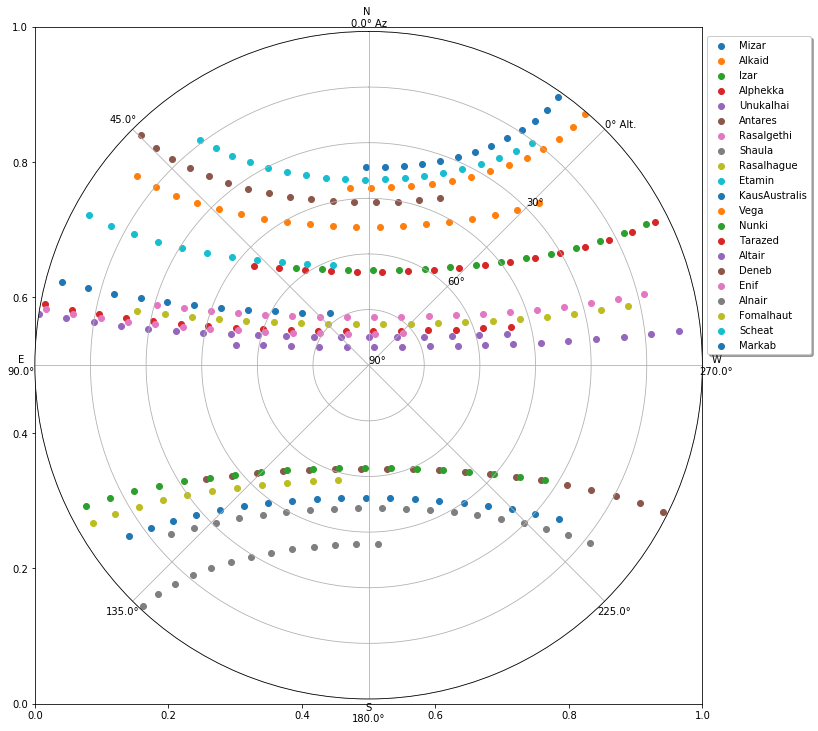

In [78]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

fig.tight_layout()

b=0
for i, my_object in enumerate(targets):
    if observing_table2['ever observable'][i]:
        ax = plot_sky(my_object, kiribati, time_grid2)
        b += 1

ax.legend(loc="upper left", bbox_to_anchor=(1,1), shadow=True);
print(str(b) + " stars are observable")

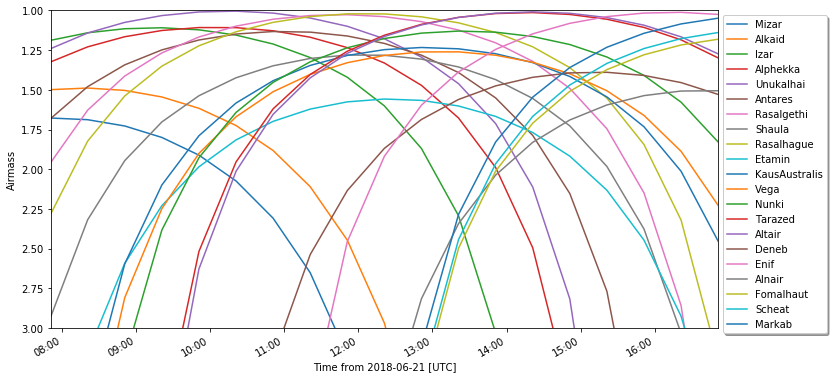

In [74]:
fig1,ax1 = plt.subplots(1,1)
fig1.set_size_inches(10,5)

fig1.tight_layout()

for i, my_object in enumerate(targets):
    if observing_table2['ever observable'][i]:
        ax = plot_airmass(my_object, kiribati, time_grid2)

ax1.legend(loc="upper left", bbox_to_anchor=(1,1), shadow=True);

## Scotland Site

In [68]:
# sets up observer object for Lockboisdale, Outer Hebrides, Scotland
scotland = Observer(longitude = -7.3080 * u.deg,
                    latitude = 57 * u.deg + 9 * u.arcmin + 12 * u.arcsec,
                    elevation = 619.9632 * u.m,
                    timezone = 'Europe/London',
                    name = "Lockboisdale, Outer Hebrides, Scotland"
                    )

In [82]:
observe_start3 = scotland.twilight_evening_astronomical(observe_date, which='nearest') 
observe_end3 = scotland.twilight_morning_astronomical(observe_date, which='next')

observing_length3 = (observe_end3 - observe_start3).to(u.h) 
observing_range3 = [observe_start3, observe_end3]

time_grid3 = time_grid_from_range(observing_range3)

print("start " + str(observe_start3))
print("end " + str(observe_end3))
print("length " + str(observing_length3))

start -999.0
end -999.0
length 0.0 h


Observing Length is 0 hours so cannot observe here.

# Summary:

The best location for viewing will be the Bairiki site because it will have the most stars visible at 21 stars compared to 9 for the South Georgia site and 0 for Scotland site.

### Due Tue Nov 14 - 5pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  